In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Necessry libraries are included

In [ ]:
from google.colab import files
file = files.upload()

Saving bank-full.csv to bank-full.csv


Data is uploaded from the local machine.

In [ ]:
df = pd.read_csv(r'bank-full.csv' , encoding="ISO-8859-1",delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Data was first converted to Csv and then this is loaded using Pandas.

In [ ]:
from IPython.display import Image


In [ ]:
Image('JOB.png')

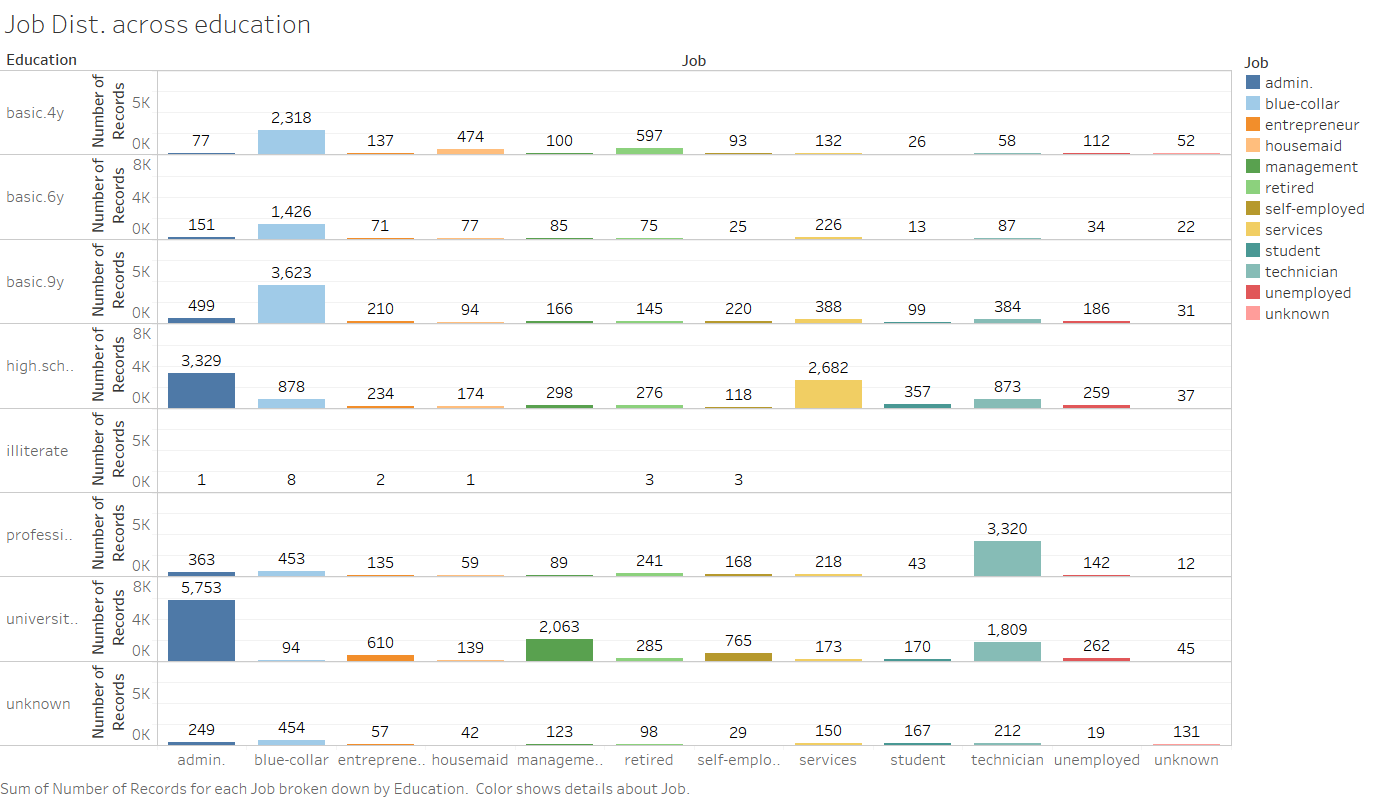

In [ ]:
Image('Job Dist. across education.png')

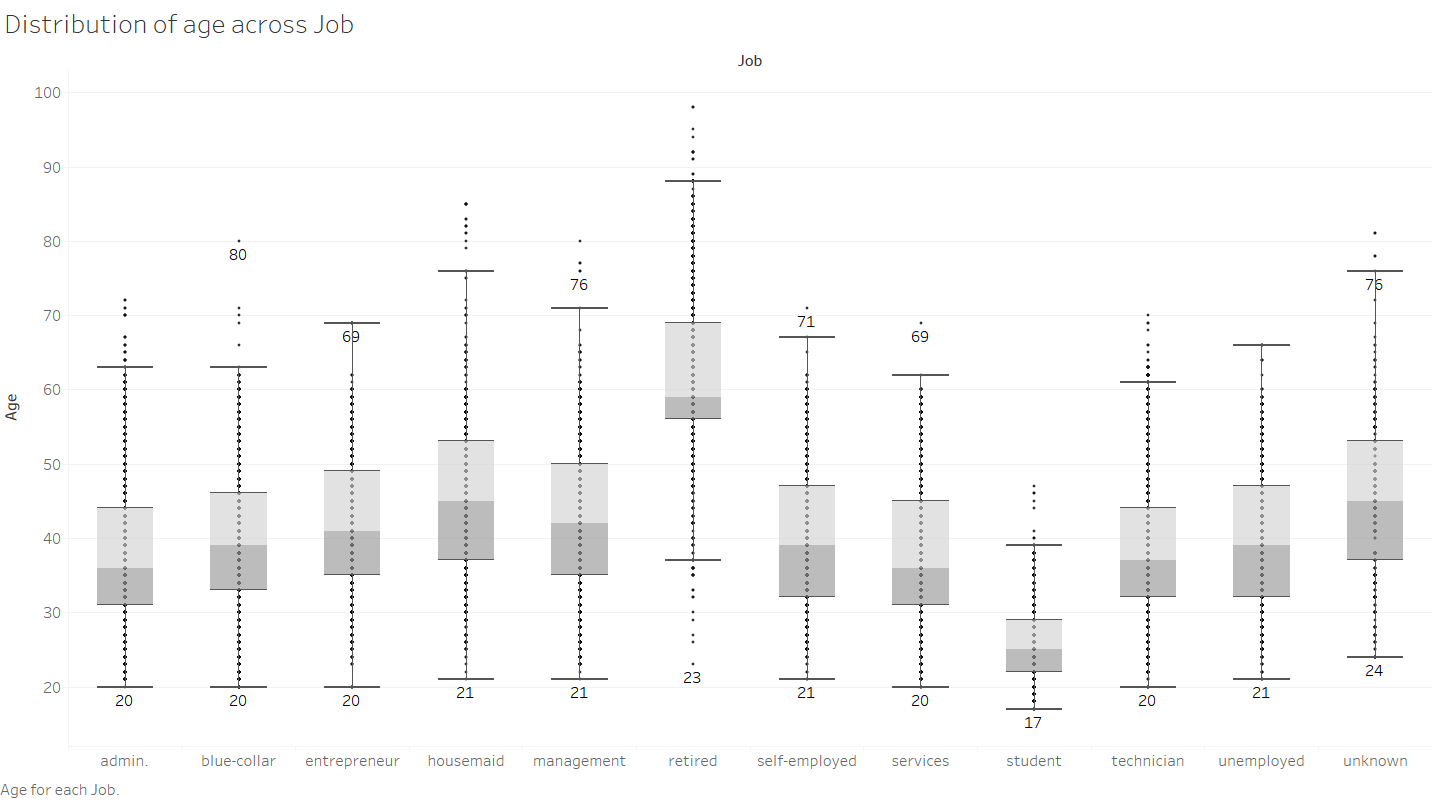

In [ ]:
Image('Job Vs Age.png')

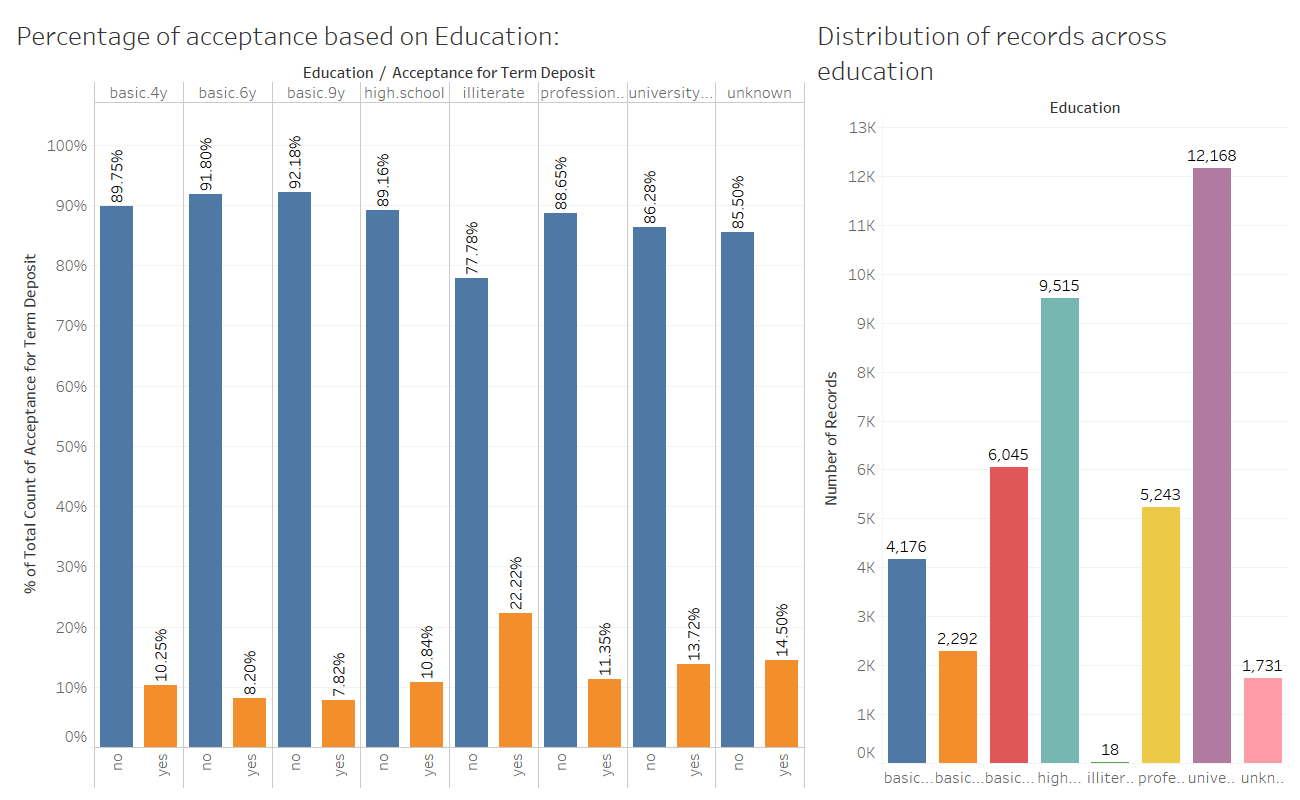

In [ ]:
Image('Education Overall.png')

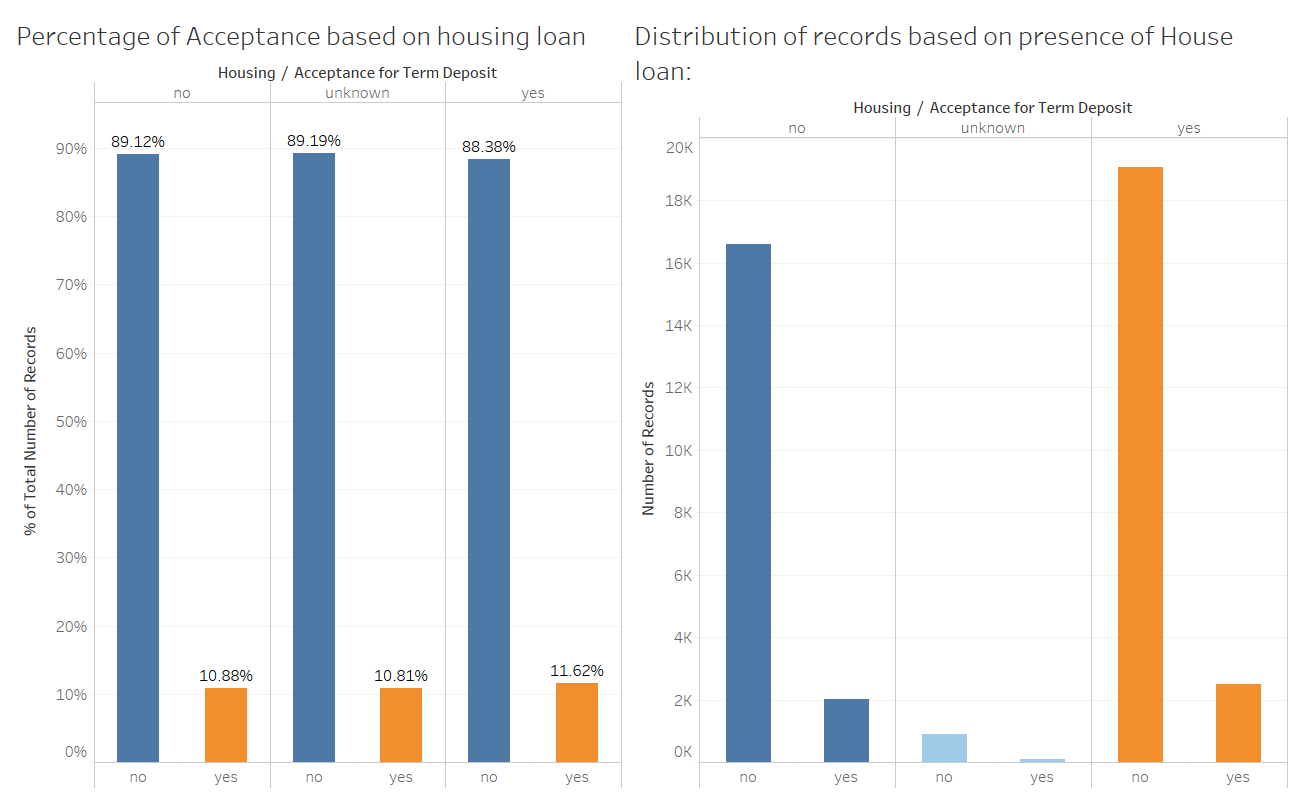

In [ ]:
Image('Housing Loan Overall.png')

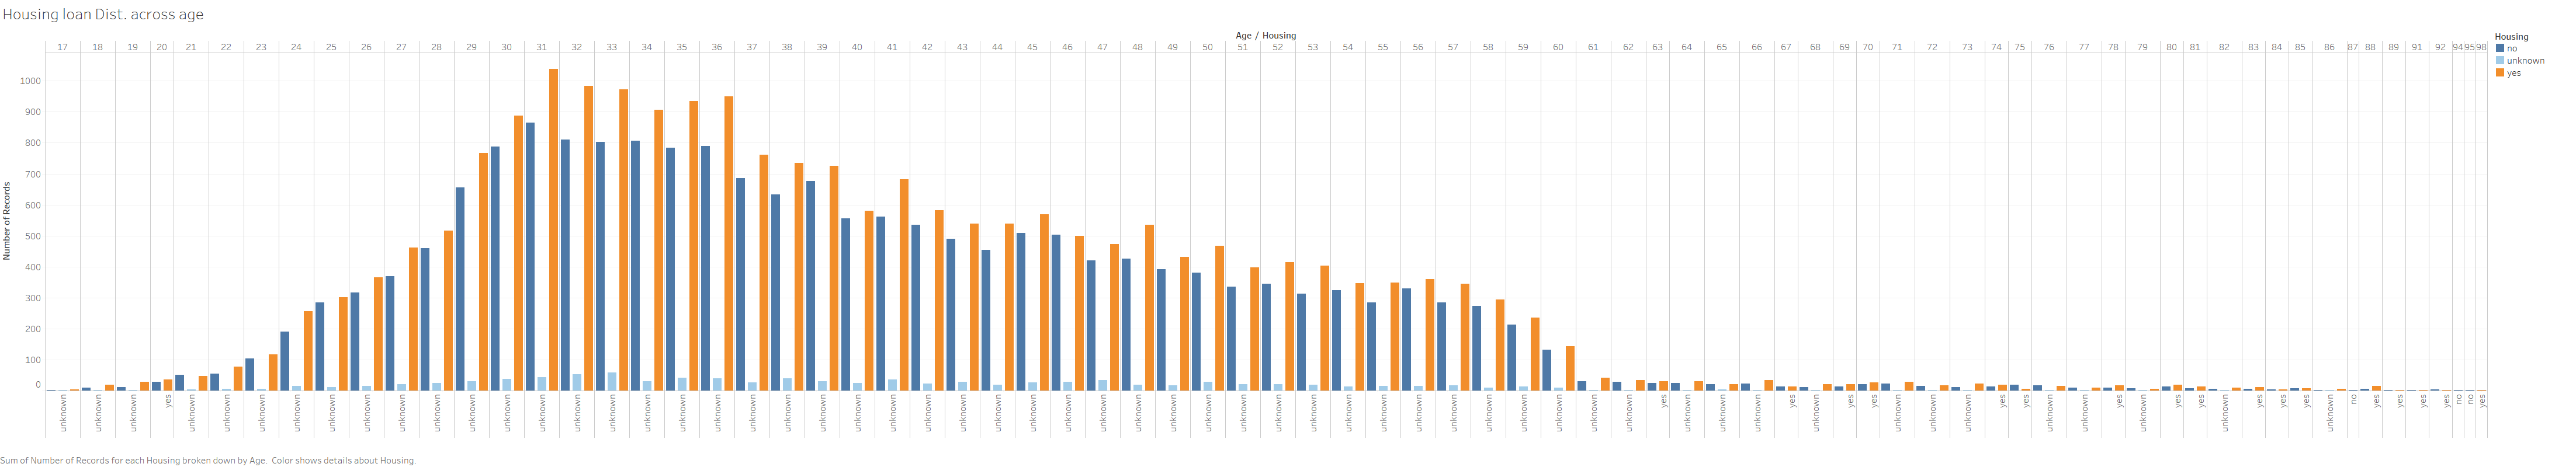

In [ ]:
Image('Housing loan Dist. across age.png')

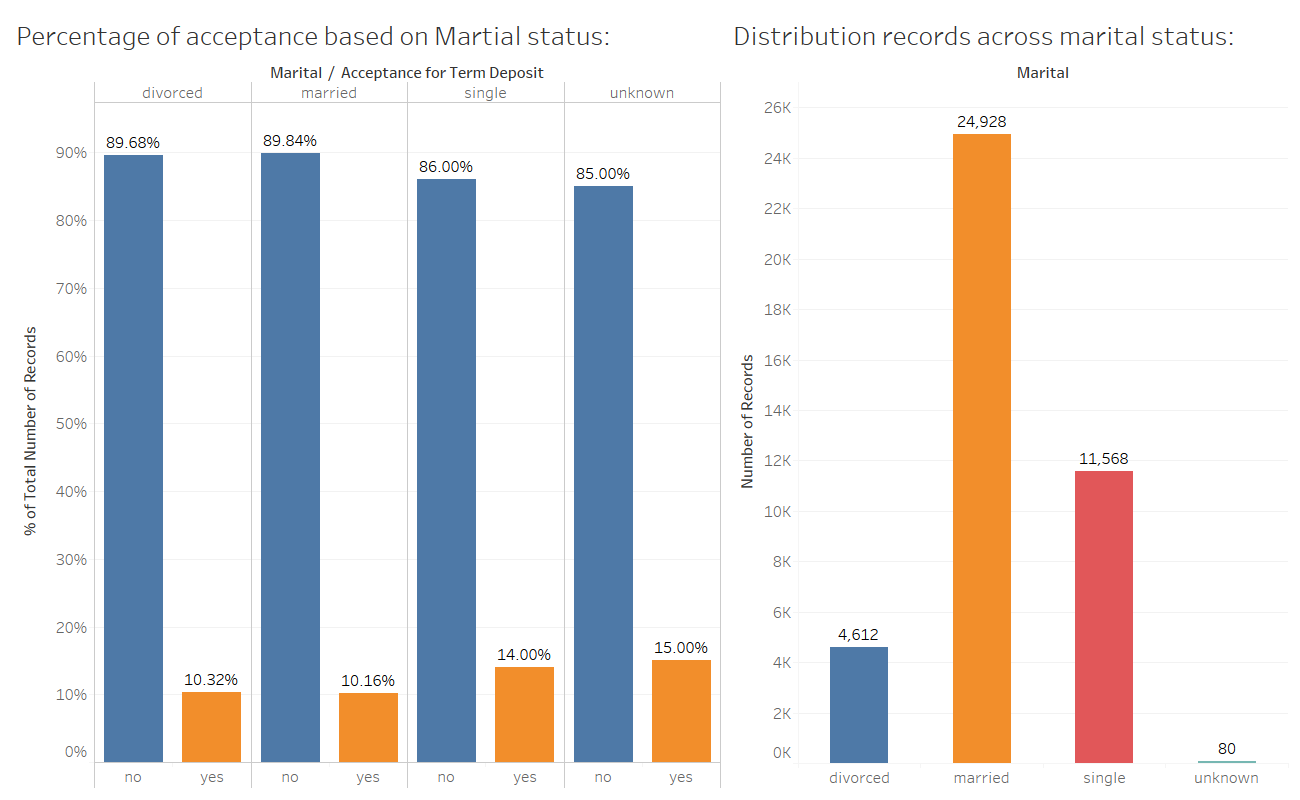

In [ ]:
Image('Marital Overall.png')

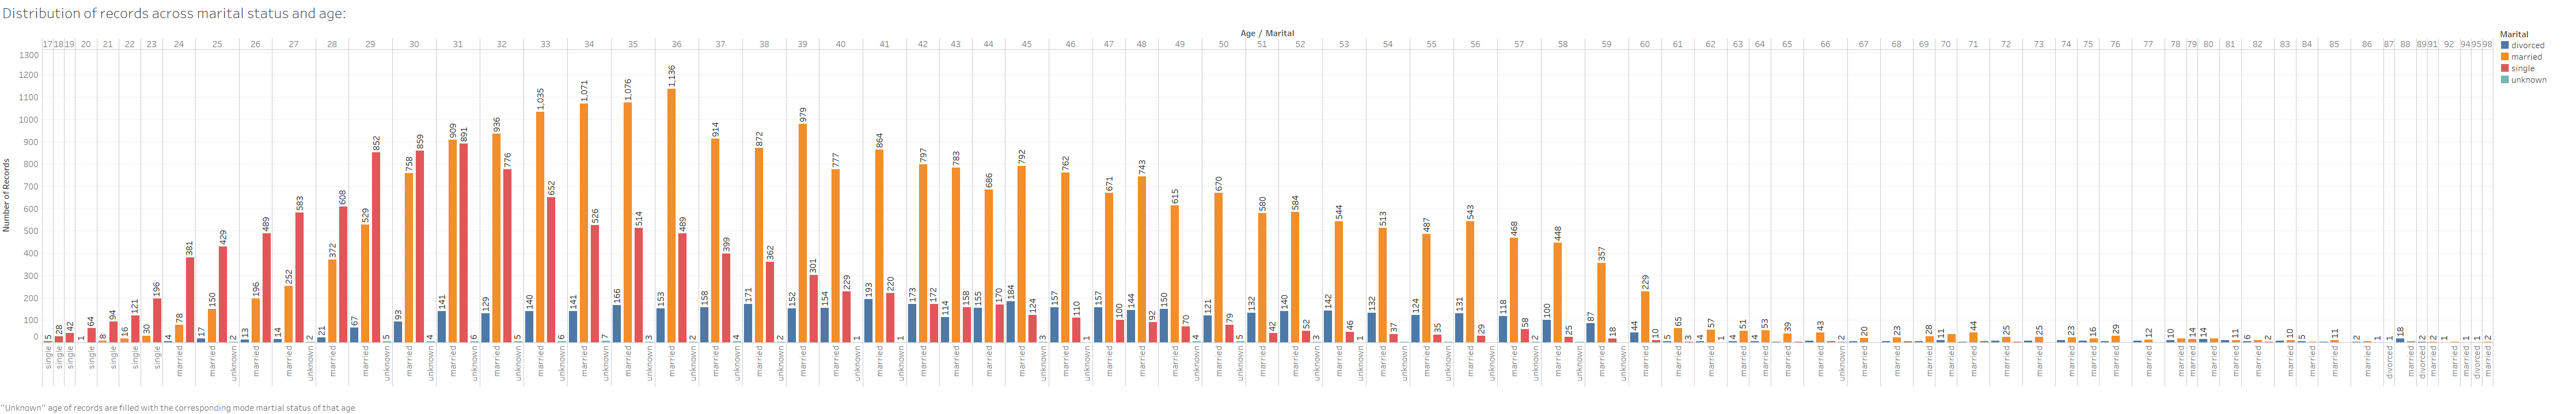

In [ ]:
Image('Martial status Dist. across age .png')

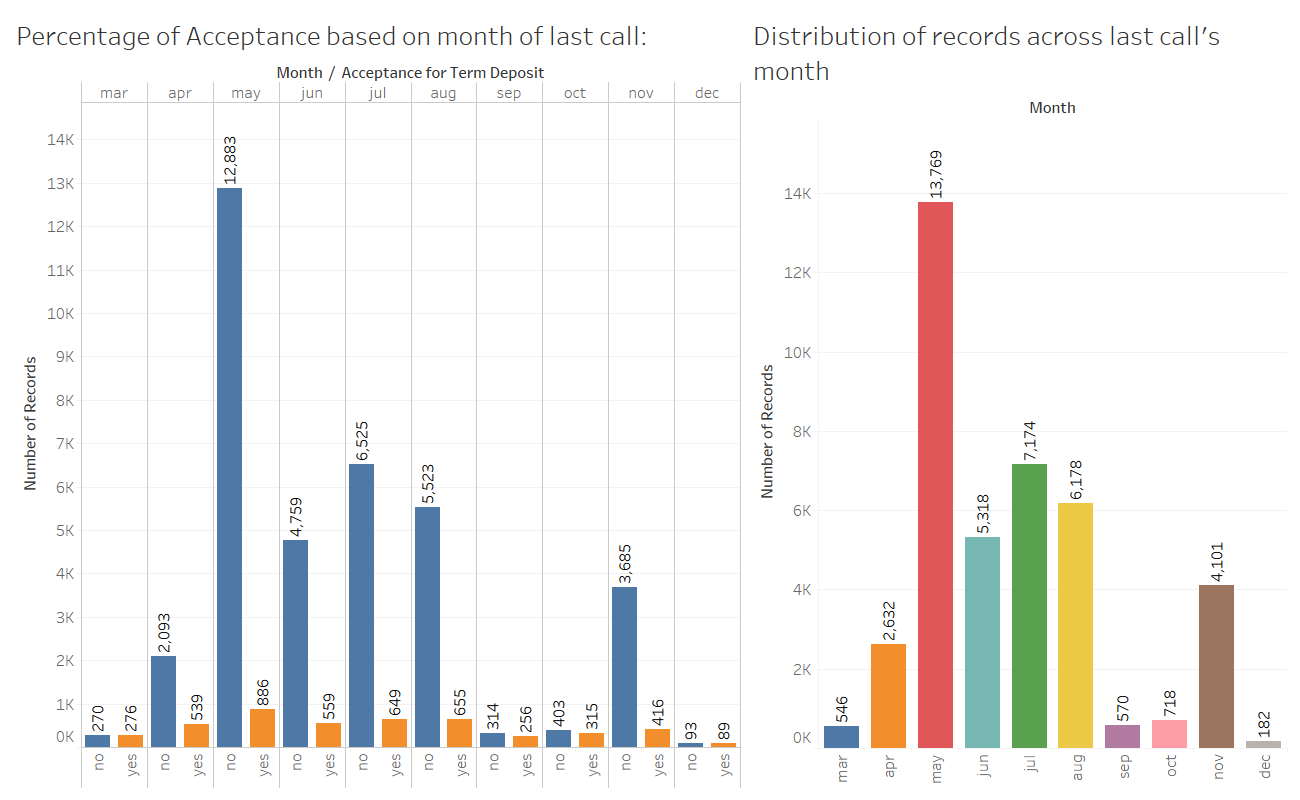

In [ ]:
Image('Month Overall.png')

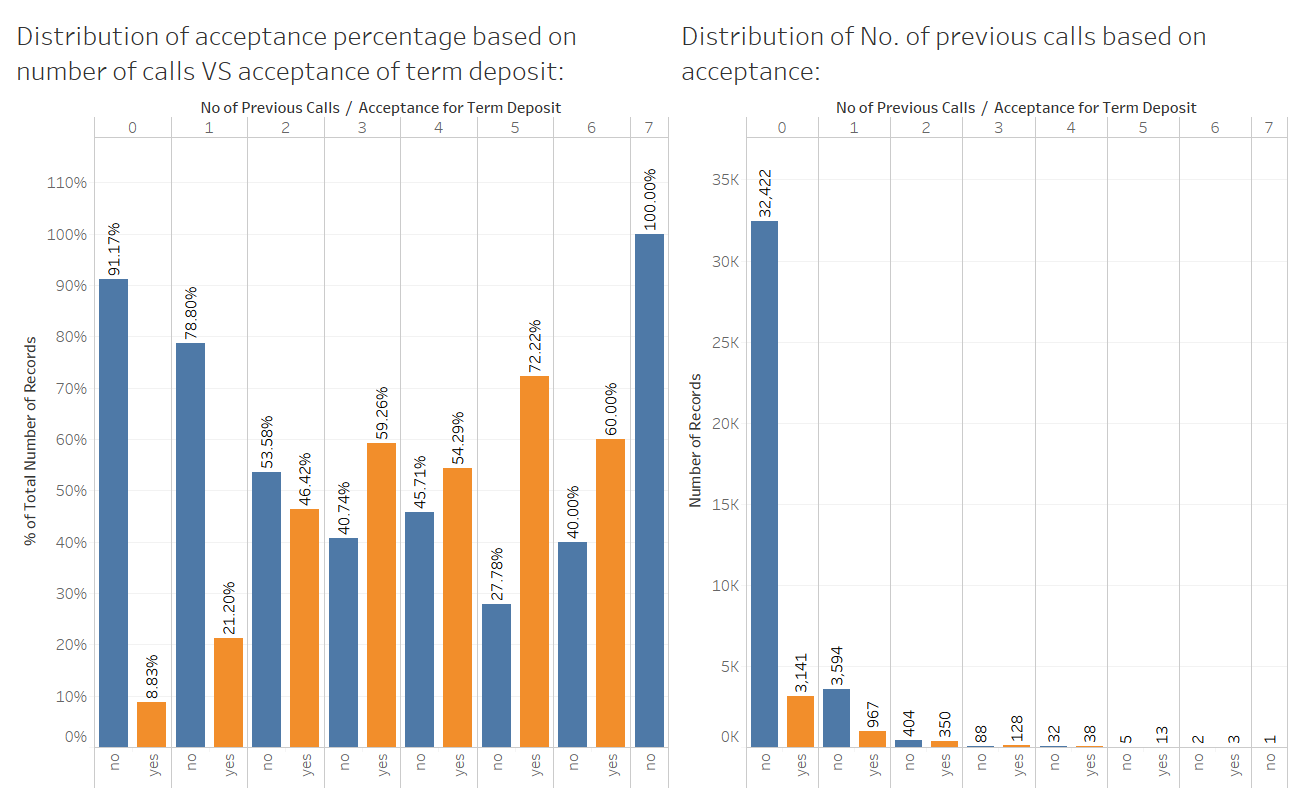

In [ ]:
Image('No. of Previous Calls Overall.png')

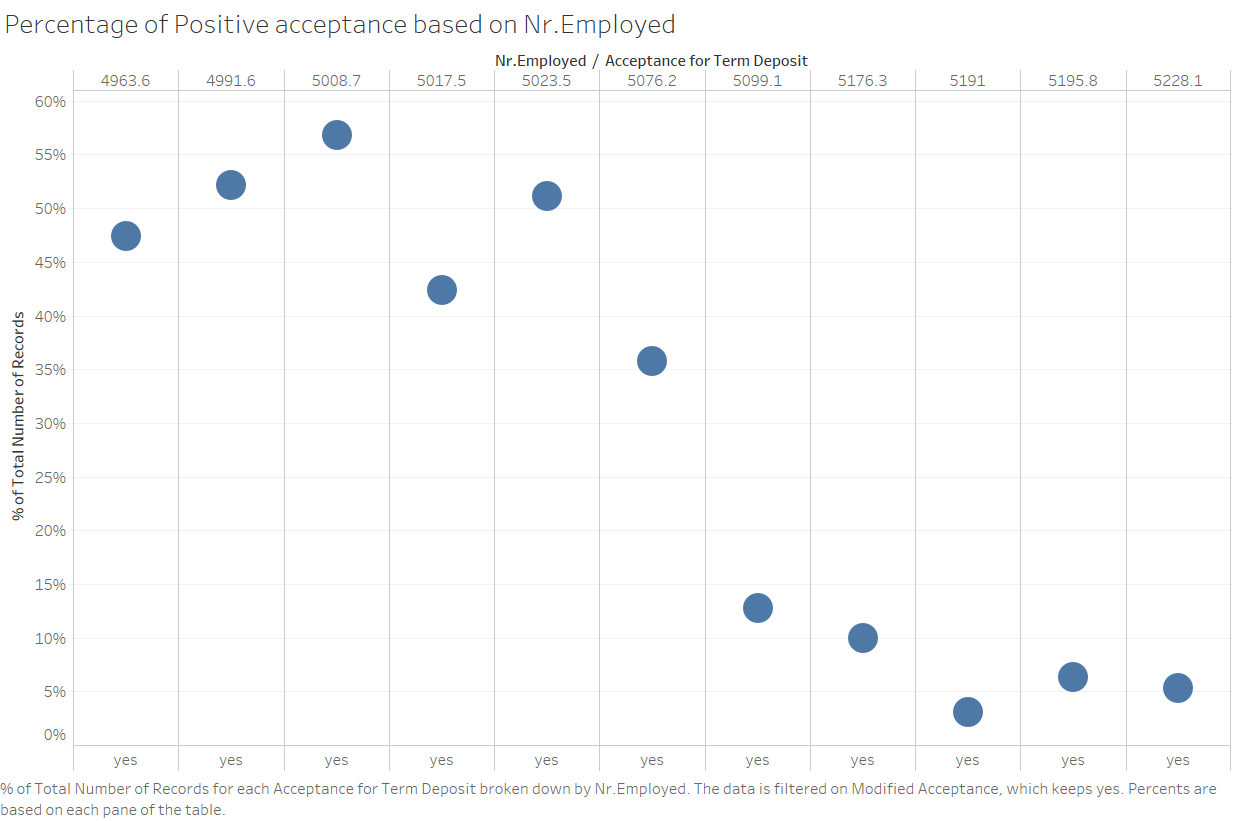

In [ ]:
Image('Nr.Employed Vs (+)Acceptance% .png')

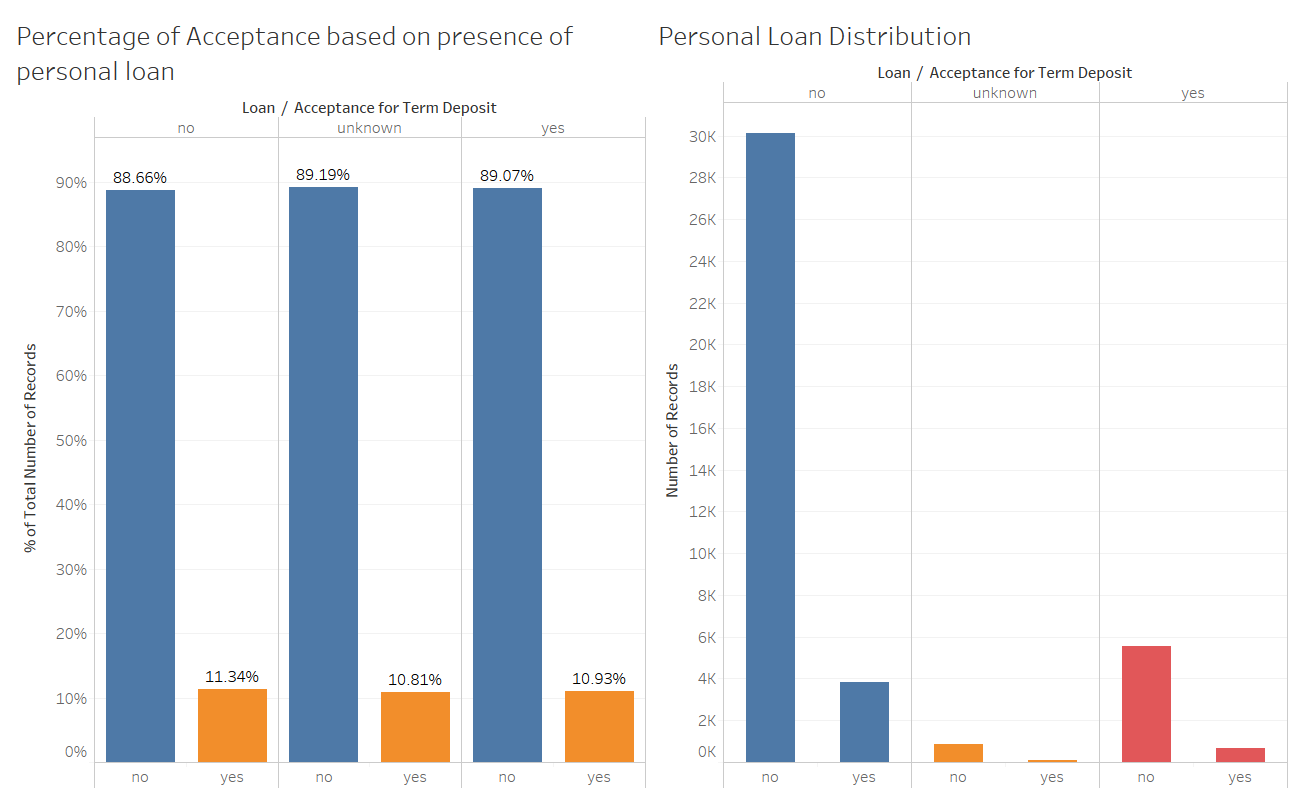

In [ ]:
Image('Personal Loan Overall.png')

In [ ]:
print('Ages above: ', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')
print('Ages below: ', df['age'].quantile(q = 0.25) -
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  70.5 are outliers
Ages below:  10.5 are outliers


Though ages above 69 are considered to be outliers there were significant number of deposits made. 

Hence they weren't removed for further process. 

More than 50% of the person above age 69 have made deposits.

In [ ]:
print('Duration above: ', df['duration'].quantile(q = 0.75) + 
                      1.5*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')
print('Duration below: ', df['duration'].quantile(q = 0.25) - 
                      1.5*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  643.0 are outliers
Duration below:  -221.0 are outliers


Duration above 644 must actually be removed as they are outliers but it has significant number of yes(deposits made).

Hence this was'nt removed as well.

In [ ]:
marital_index = df[df['marital']=="unknown"].index.tolist()
print('Number of unknowns in Marital Status : ',len(marital_index))

Number of unknowns in Marital Status :  0


In [ ]:
for i in range (0,len(marital_index)):
    age = df.iloc[marital_index[i],0]
    temp_df = df[df['age']==age]
    m_status = temp_df.loc[:,'marital']
    mode_status = m_status.mode()[0]
    df.loc[marital_index[i], 'marital'] = mode_status
 
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Marital Status had a good connection with age. 

Hence the unkowns in marital status is filled with mode of the marital status for a particular age.

After filling the distribution is as mentioned above.

In [ ]:
job_index = df[df['job']=="unknown"].index.tolist()
print('Number of unknowns in Job : ',len(job_index))

Number of unknowns in Job :  288


In [ ]:
for i in range (0,len(job_index)):
    edu = df.iloc[job_index[i],3]
    temp_df = df[df['education']==edu]
    job_df = temp_df.loc[:,'job']
    job = job_df.mode()[0]
    df.loc[job_index[i], 'job'] = job
   
df['job'].value_counts()

blue-collar      9981
management       9497
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

Job had a very dependency over education.

Hence the the unknowns in job were filled with mode job of particular education.

The results post this process is mentioned above.

In [ ]:
housing_index = df[df['housing']=="unknown"].index.tolist()
print('Number of unknows in housing : ',len(housing_index))

Number of unknows in housing :  0


In [ ]:
for i in range (0,len(housing_index)):
    age = df.iloc[housing_index[i],0]
    temp_df = df[df['age']==age]
    h_status = temp_df.loc[:,'housing']
    mode_status = h_status.mode()[0]
    df.loc[housing_index[i], 'housing'] = mode_status
    
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

Housing loan had a dependency over age. Person with age less than 20 never took a housing loan and in a age group (25-50) the housing loan percentage were higher.

Hence the the unknowns in job were filled with mode job of particular education.

The results post this process is mentioned above.

In [ ]:
df.to_csv("Data_Filled.csv", sep=',')

In [ ]:
df = pd.read_csv("Data_Filled.csv")
df = df.iloc[ : ,1:]
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


After Filling the unkowns of influencing attributes the data is written into a new file 'Data_Filled' , Which is used for further process.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

Necessary libraries for splitting and evaluation are loaded.

In [ ]:
X = df.iloc[:,0:16]
Y = df.iloc[:,16]
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.25, stratify=Y)

Train and Test is split in 3:1 ratio, due to very less percentage of acceptance(deposit) level.

Stratified split is performed to retain the distribution of deposit acceptance.

In [ ]:
col=[1,2,3,4,5,6,7,8,10,11,12,13,14,15]
cat = X.columns[col]
le=[]

for i in cat:
    tem = LabelEncoder().fit(X_train[i])
    le.append(tem)
    X_train[i]=tem.transform(X_train[i])

tem = LabelEncoder().fit(Y_train)	
le.append(tem)
Y_train=tem.transform(Y_train)

The categorical variables are transformed to numeric values to perform SMOTE and model building.

In [ ]:
sm = SMOTE(sampling_strategy='float', k_neighbors=4, ratio = 0.4)
Xnew,Ynew = sm.fit_resample(X_train,Y_train)
Xnew = pd.DataFrame(Xnew)
Ynew = pd.DataFrame(Ynew)

Since the number of data ponts with label 'y' (Making deposit) is very less, SMOTE is performed to increase those points.

In [ ]:
j=0
for i in col:
    Xnew[i] = np.round(Xnew[i])
    Xnew[i] = Xnew[i].astype(int)
    #Xnew[i] = le[j].inverse_transform(Xnew[i])
    j=j+1
#Ynew = le[j].inverse_transform(Ynew)

Since there were few fractional values post transforming those are rounded to ensure they are still categorical.

In [ ]:
le1=[]

from sklearn.preprocessing import LabelEncoder
for i in cat:
    tem = LabelEncoder().fit(X_test[i])
    le1.append(tem)
    X_test[i]=tem.transform(X_test[i])

tem = LabelEncoder().fit(Y_test)	
le1.append(tem)
Y_test=tem.transform(Y_test)


Test set is also transformed.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

Evaluation Metrics are loaded

Confusion Matrix : 
 [[948  53]
 [ 98  32]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1001
           1       0.38      0.25      0.30       130

    accuracy                           0.87      1131
   macro avg       0.64      0.60      0.61      1131
weighted avg       0.85      0.87      0.85      1131

Accuracy : 0.8664898320070734


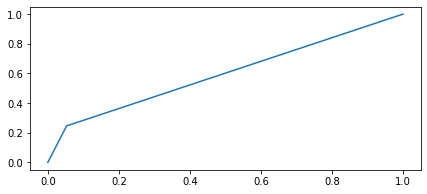

AUC: 0.5966033966033966


In [ ]:
from sklearn.tree import DecisionTreeClassifier 

dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtcpred = dtc.predict(X_test)

print('Confusion Matrix : \n', metrics.confusion_matrix(Y_test, dtcpred ))
print('Classification Report : \n', metrics.classification_report(Y_test,dtcpred))  
print('Accuracy :',metrics.accuracy_score(Y_test, dtcpred))

fpr, tpr, threshold = metrics.roc_curve(Y_test,dtcpred)

# Print ROC curve
plt.rcParams['figure.figsize'] = (7 , 3)
plt.plot(fpr,tpr)
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

Decision Tree implementation without any optimisation

Confusion Matrix : 
 [[9701  280]
 [ 839  483]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      9981
           1       0.63      0.37      0.46      1322

    accuracy                           0.90     11303
   macro avg       0.78      0.67      0.70     11303
weighted avg       0.89      0.90      0.89     11303

Accuracy : 0.9009997345837388


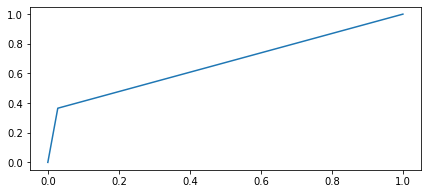

AUC: 0.6686511103320212


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 30) 
rfc.fit(X_train, Y_train)
rfcpred = rfc.predict(X_test)

print('Confusion Matrix : \n', metrics.confusion_matrix(Y_test, rfcpred ))
print('Classification Report : \n', metrics.classification_report(Y_test,rfcpred))  
print('Accuracy :',metrics.accuracy_score(Y_test, rfcpred))

fpr, tpr, threshold = metrics.roc_curve(Y_test,rfcpred)

# Print ROC curve
plt.rcParams['figure.figsize'] = (7 , 3)
plt.plot(fpr,tpr)
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

Random Forest Implementation without any optimiation.

But the results are evident that it performs better than decision tree.

Hence further fine tuning is performed for this.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
min_samples_split = [5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

#print(random_grid)

Randomizedsearch is performed to determine the optimal hyperparameters.

In [ ]:
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 10, cv = 10, 
                               verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
rf_random.fit(X_train, Y_train)

cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)
    
print(rf_random.best_estimator_)
print(rf_random.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.4min finished


0.33563994267339714 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
0.33549523909147294 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
0.28944506697610456 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
0.29289162478370845 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.33563994267339714 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.2905613266796641 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
0.29111785146975944 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
0.28927725650670316 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
0.33563994267339714 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
0.2896686630441937 {'n_estimators': 110, '

Best parameters are determined with least mean test score.

Confusion Matrix : 
 [[8840  297]
 [ 557  603]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      9137
           1       0.67      0.52      0.59      1160

   micro avg       0.92      0.92      0.92     10297
   macro avg       0.81      0.74      0.77     10297
weighted avg       0.91      0.92      0.91     10297

Accuracy : 0.9170632222977566


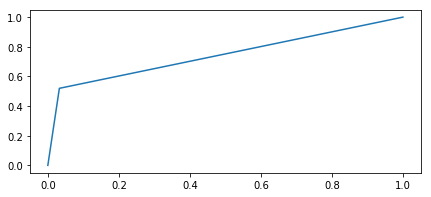

AUC: 0.743661193782008


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 155, max_features = 'auto', min_samples_split = 10 , max_depth = 45) 
rfc.fit(X_train, Y_train)
rfcpred = rfc.predict(X_test)

print('Confusion Matrix : \n', metrics.confusion_matrix(Y_test, rfcpred ))
print('Classification Report : \n', metrics.classification_report(Y_test,rfcpred))  
print('Accuracy :',metrics.accuracy_score(Y_test, rfcpred))

fpr, tpr, threshold = metrics.roc_curve(Y_test,rfcpred)

# Print ROC curve
plt.rcParams['figure.figsize'] = (7 , 3)
plt.plot(fpr,tpr)
plt.show()

auc = np.trapz(tpr,fpr)
print('AUC:', auc)

Random Forest is implemented with the optimal parameters achieved using Random Search.